In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flight_train=pd.read_csv('train_1.csv')
flight_test=pd.read_csv('test_1.csv')

In [3]:
#Label the categorical variable with id (number)
carrier_id= pd.Series(range(len(flight_train['unique_carrier'].unique())),index=flight_train['unique_carrier'].unique())
origin_id= pd.Series(range(len(flight_train['origin'].unique())),index=flight_train['origin'].unique())
destination_id= pd.Series(range(len(flight_train['destination'].unique())),index=flight_train['destination'].unique())

In [4]:
def preprocess(dataset):
    #To replace the text with ID
    dataset['unique_carrier'] =dataset['unique_carrier'].map(carrier_id)
    dataset['origin'] =dataset['origin'].map(origin_id)
    dataset['destination'] =dataset['destination'].map(destination_id)
    #To reformat the data
    dataset['month']= dataset['month'].str.replace('M-','').astype(int)
    dataset['day_of_month']= dataset['day_of_month'].str.replace('D-','').astype(int)
    dataset['day_of_week']= dataset['day_of_week'].str.replace('W-','').astype(int)
    #Extract the hour from departure_time
    dataset['departure_time'] = dataset['departure_time'].apply(
    lambda x:
    str(x).zfill(4)
    ).apply(
    lambda x:
    int(x[:2])
    )
    #Make the is_delayed column become numerical variable and move to last column
    if 'is_delayed' in dataset:
        dataset['is_delayed'] = dataset['is_delayed'].astype('category').cat.codes #0 is NO, 1 is YES
        last_column = dataset.pop('is_delayed')
        dataset.insert(len(dataset.columns),'is_delayed', last_column)
    return dataset

In [5]:
preprocess(flight_train)


,unique_carrier,origin,destination,departure_time,month,day_of_month,day_of_week,distance,is_delayed
0,0,0,0,11,12,16,5,1587,0
1,1,1,1,23,3,22,3,2454,0
2,2,2,2,20,1,14,5,1437,1
3,3,3,3,16,10,14,6,328,0
4,2,4,4,11,5,18,3,957,0
...,...,...,...,...,...,...,...,...,...
89995,5,22,66,20,6,20,1,448,0
89996,4,38,27,6,12,16,6,618,0
89997,16,153,66,15,1,31,2,83,0
89998,14,12,192,13,12,6,2,146,0


In [6]:
preprocess(flight_test)

,unique_carrier,origin,destination,departure_time,month,day_of_month,day_of_week,distance
0,0,54,0,16,7,24,7,952
1,3,101,156,9,12,31,7,323
2,3,64,65,16,12,14,4,1056
3,5,10,45,14,2,11,5,1557
4,3,25,17,6,11,10,4,368
...,...,...,...,...,...,...,...,...
9995,15,78,4,7,2,12,7,349
9996,8,19,39,20,6,8,3,1034
9997,6,68,38,11,7,8,6,36
9998,6,87,17,20,10,31,1,926


In [7]:
#number of data that is delayed
flight_train[flight_train['is_delayed']==1]['is_delayed'].count()

17140

In [8]:
flight_train.corr()['is_delayed']

unique_carrier    0.001208
origin           -0.036850
destination       0.019010
departure_time    0.243987
month             0.017121
day_of_month      0.024551
day_of_week       0.010713
distance         -0.003695
is_delayed        1.000000
Name: is_delayed, dtype: float64

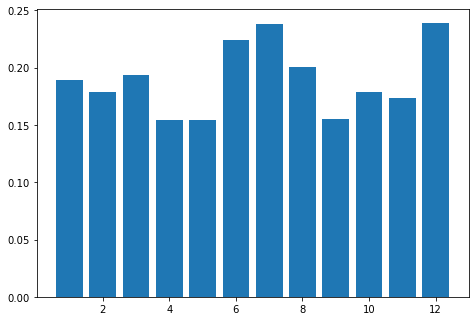

In [9]:
avg_month=flight_train.groupby(['month']).mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(avg_month.index,avg_month['is_delayed'])
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


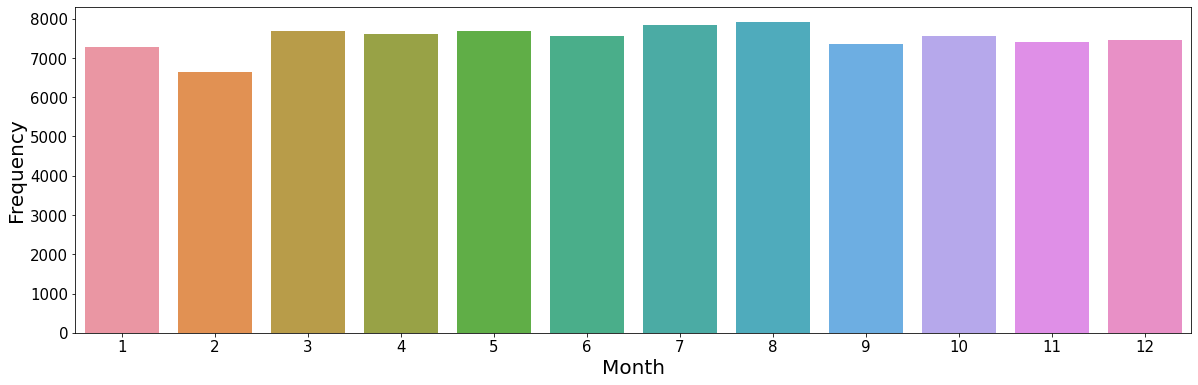

In [10]:
plt.figure(figsize = (20, 6))
sns.countplot(flight_train['month'])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Month", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


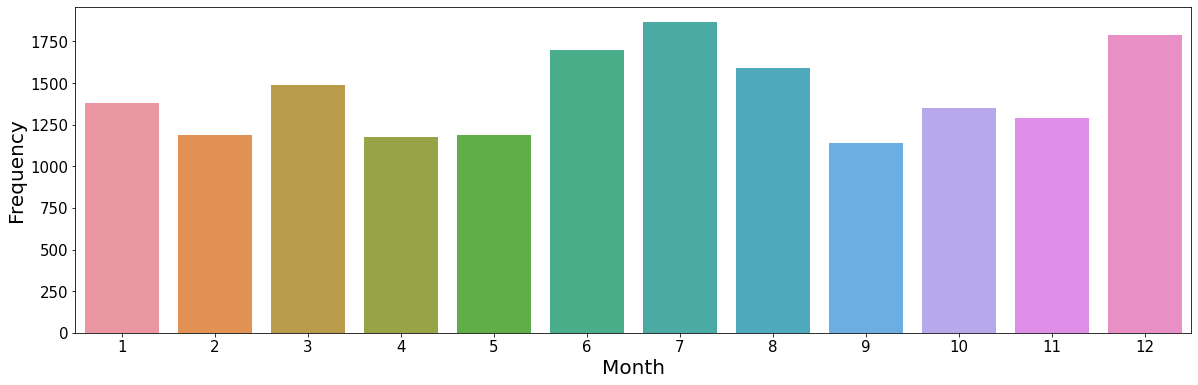

In [11]:
plt.figure(figsize = (20, 6))
sns.countplot(flight_train[flight_train['is_delayed']==1]['month'])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Month", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

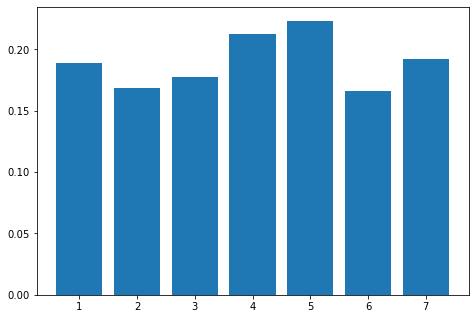

In [12]:
avg_day_of_week=flight_train.groupby(['day_of_week']).mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(avg_day_of_week.index,avg_day_of_week['is_delayed'])
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


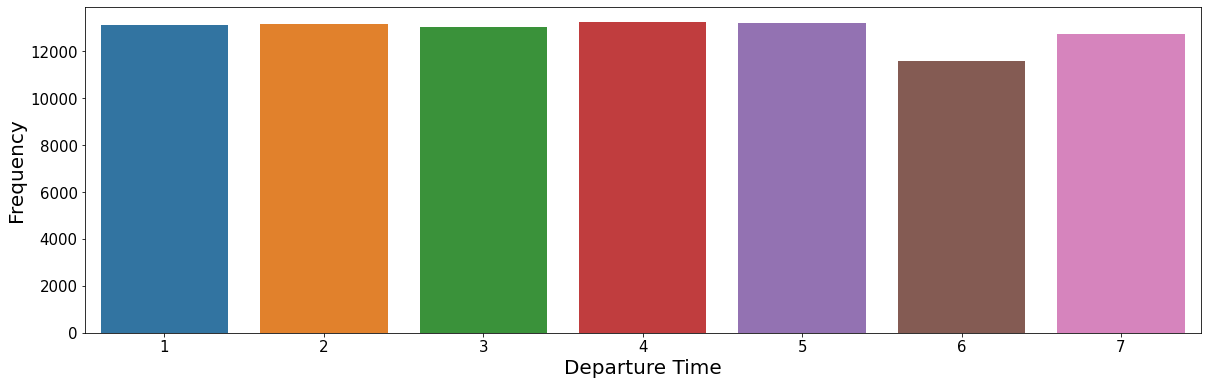

In [13]:
plt.figure(figsize = (20, 6))
sns.countplot(flight_train['day_of_week'])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Departure Time", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


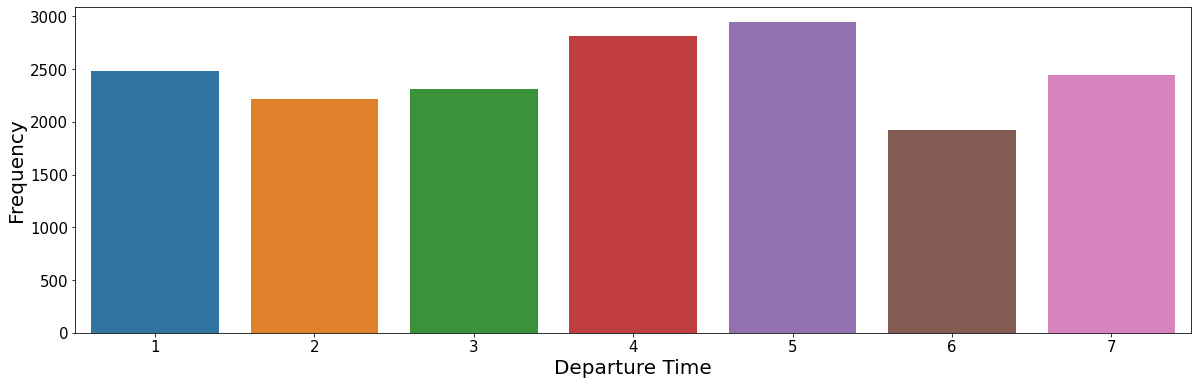

In [14]:
plt.figure(figsize = (20, 6))
sns.countplot(flight_train[flight_train['is_delayed']==1]['day_of_week'])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Departure Time", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

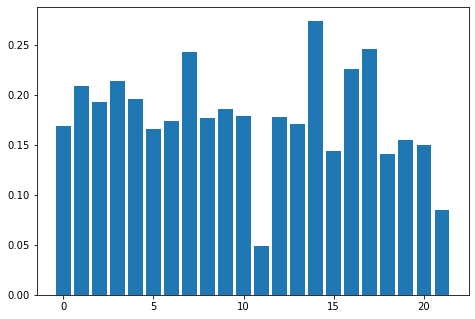

In [15]:
avg_carrier=flight_train.groupby(['unique_carrier']).mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(avg_carrier.index,avg_carrier['is_delayed'])
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


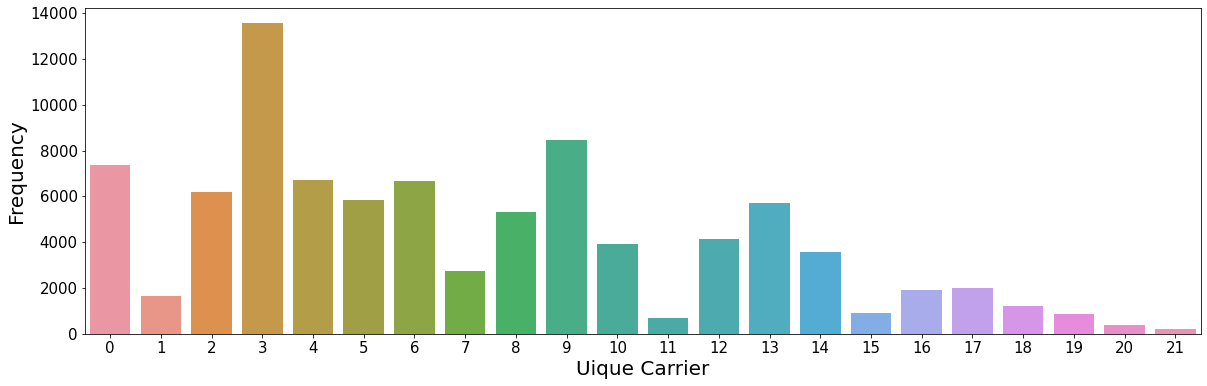

In [16]:
plt.figure(figsize = (20, 6))
sns.countplot(flight_train['unique_carrier'])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Uique Carrier", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


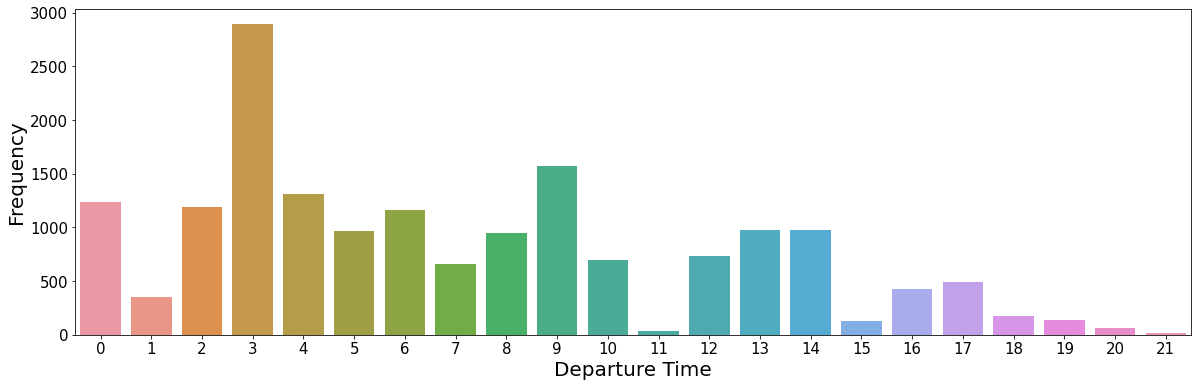

In [17]:
plt.figure(figsize = (20, 6))
sns.countplot(flight_train[flight_train['is_delayed']==1]['unique_carrier'])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Departure Time", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

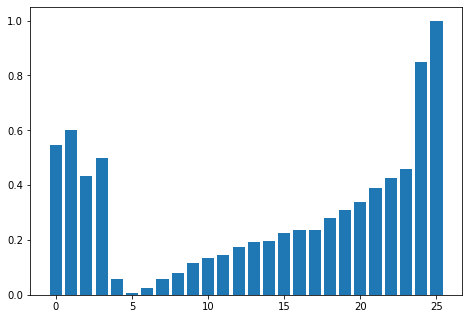

In [18]:
avg_departure_time=flight_train.groupby(['departure_time']).mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(avg_departure_time.index,avg_departure_time['is_delayed'])
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


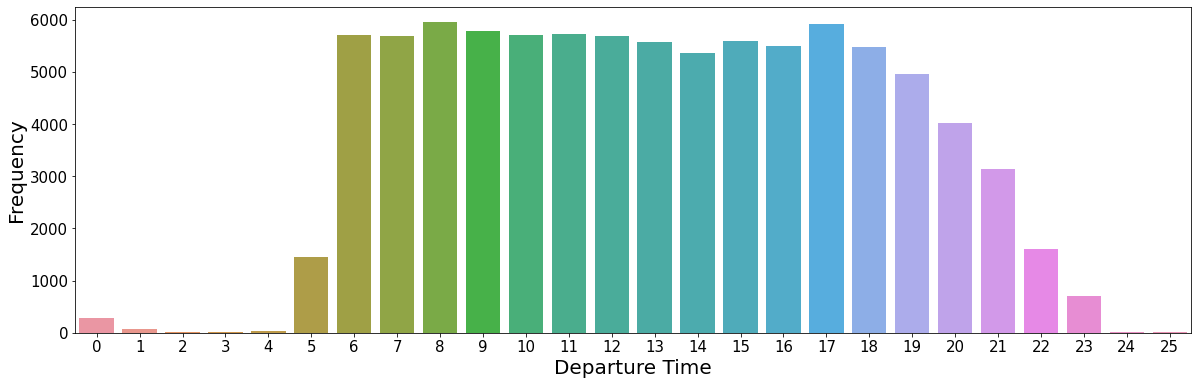

In [19]:
plt.figure(figsize = (20, 6))
sns.countplot(flight_train['departure_time'])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Departure Time", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


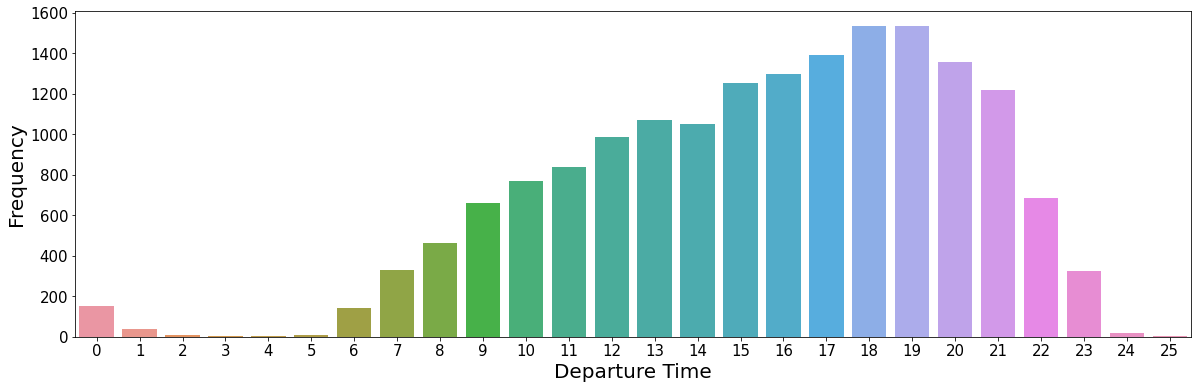

In [20]:
plt.figure(figsize = (20, 6))
sns.countplot(flight_train[flight_train['is_delayed']==1]['departure_time'])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Departure Time", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

(array([1.8140e+04, 2.3150e+04, 1.7195e+04, 1.1951e+04, 7.0290e+03,
        3.0240e+03, 3.4620e+03, 1.7430e+03, 1.2410e+03, 1.8260e+03,
        9.5900e+02, 1.0800e+02, 1.3000e+01, 2.7000e+01, 9.0000e+00,
        4.5000e+01, 1.8000e+01, 3.1000e+01, 2.1000e+01, 8.0000e+00]),
 array([  31.  ,  277.55,  524.1 ,  770.65, 1017.2 , 1263.75, 1510.3 ,
        1756.85, 2003.4 , 2249.95, 2496.5 , 2743.05, 2989.6 , 3236.15,
        3482.7 , 3729.25, 3975.8 , 4222.35, 4468.9 , 4715.45, 4962.  ]),
 <BarContainer object of 20 artists>)

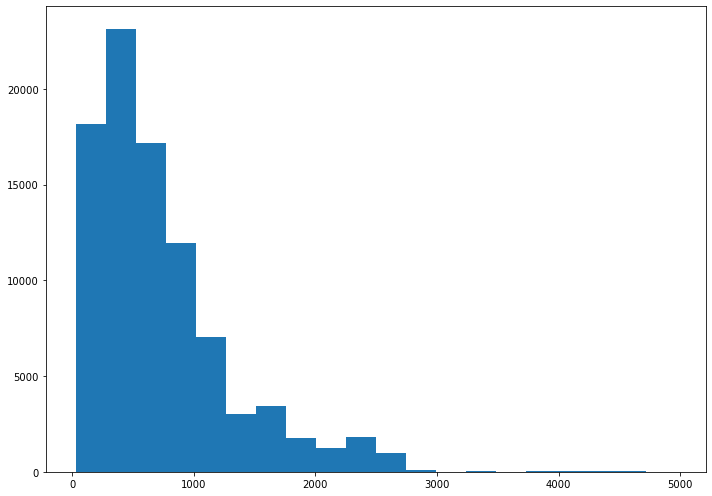

In [21]:
fig, axs = plt.subplots(1, 1,figsize =(10, 7), tight_layout = True)
axs.hist(flight_train['distance'],bins=20)

(array([3.150e+03, 4.439e+03, 3.588e+03, 2.307e+03, 1.383e+03, 6.050e+02,
        6.650e+02, 3.290e+02, 2.230e+02, 2.830e+02, 1.360e+02, 1.100e+01,
        3.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 8.000e+00,
        2.000e+00, 1.000e+00]),
 array([  31.  ,  277.55,  524.1 ,  770.65, 1017.2 , 1263.75, 1510.3 ,
        1756.85, 2003.4 , 2249.95, 2496.5 , 2743.05, 2989.6 , 3236.15,
        3482.7 , 3729.25, 3975.8 , 4222.35, 4468.9 , 4715.45, 4962.  ]),
 <BarContainer object of 20 artists>)

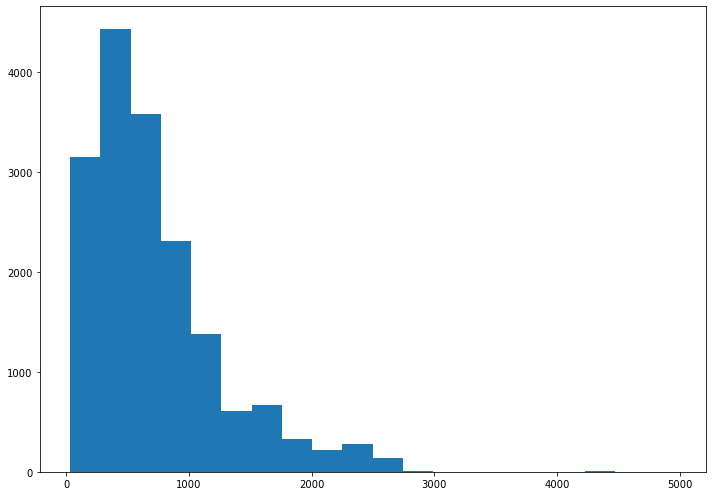

In [22]:
fig, axs = plt.subplots(1, 1,figsize =(10, 7), tight_layout = True)
axs.hist(flight_train[flight_train['is_delayed']==1]['distance'],bins=20)

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
cv = RepeatedStratifiedKFold(n_splits=9, n_repeats=5, random_state=1)

In [24]:
X = flight_train.iloc[:,:-1]
y= flight_train['is_delayed']

In [25]:
#Create randomforest classifier with k-fold cross-validation
model_RF= RandomForestClassifier()
scorings=['accuracy', 'f1', 'precision', 'recall']
scores = cross_validate(model_RF,  X, y, scoring=scorings, cv=cv, n_jobs=-1, error_score='raise')

mean_scores = {
  key: np.mean(item) for key, item in scores.items()
}
mean_scores


{'fit_time': 29.741567839516534,
 'score_time': 0.701495377222697,
 'test_accuracy': 0.8170488888888892,
 'test_f1': 0.1822087481803959,
 'test_precision': 0.6128137385239235,
 'test_recall': 0.10705962612516573}

     K  Train Accuracy
0    3        0.765269
1    4        0.797480
2    5        0.785033
3    6        0.801389
4    7        0.794338
5    8        0.803576
6    9        0.798947
7   10        0.805260
8   11        0.802191
9   12        0.806822
10  13        0.804736
11  14        0.807622
12  15        0.806378
13  16        0.808224
14  17        0.807433
15  18        0.808744
16  19        0.808360
17  20        0.809093
18  21        0.808818
19  22        0.809300
20  23        0.809087
21  24        0.809369
22  25        0.809242


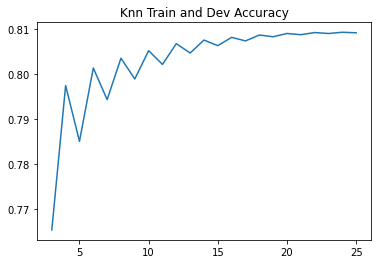

In [26]:
from sklearn.neighbors import KNeighborsClassifier
#run K-Nearest Neighbors classifier with k from 3 to 25
k=range(3,26)
knn_train_accuracy=[] 
knn_dev_accuracy=[] 
for i in k: 
    model_knn=KNeighborsClassifier(n_neighbors=i)
    knn_scores = cross_val_score(model_knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    knn_train_accuracy.append(np.mean(knn_scores))

Data=pd.DataFrame({"K": k, "Train Accuracy" : knn_train_accuracy})
print(Data)

plt.plot(k,knn_train_accuracy,label="Train accuracy")
plt.title("Knn Train and Dev Accuracy") 
plt.show()

In [27]:
# create K-Nearest Neighbors classifier with K=24
model_knn=KNeighborsClassifier(n_neighbors=24) 

scorings=['accuracy', 'f1', 'precision', 'recall']
knn_scores = cross_validate(model_knn,  X, y, scoring=scorings, cv=cv, n_jobs=-1, error_score='raise')
mean_scores_knn = {
  key: np.mean(item) for key, item in knn_scores.items()
}
mean_scores_knn

{'fit_time': 0.8092066182030572,
 'score_time': 1.3380380153656006,
 'test_accuracy': 0.809368888888889,
 'test_f1': 0.011083480090547815,
 'test_precision': 0.4669030152184752,
 'test_recall': 0.005612558234142301}

In [28]:
from sklearn.linear_model import LogisticRegression
#create Logictic Regression model
model_LR=LogisticRegression()
scorings=['accuracy', 'f1', 'precision', 'recall']
LR_scores = cross_validate(model_LR,  X, y, scoring=scorings, cv=cv, n_jobs=-1, error_score='raise')
# report performance
mean_scores_LR = {
  key: np.mean(item) for key, item in LR_scores.items()
}
mean_scores_LR


{'fit_time': 1.644478538301256,
 'score_time': 0.030718925264146595,
 'test_accuracy': 0.8084600000000001,
 'test_f1': 0.012388782711956804,
 'test_precision': 0.35714364499266454,
 'test_recall': 0.00638287861076189}

In [34]:
model_RF.fit(X,y)

RandomForestClassifier()

In [35]:
single_yhat=model_RF.predict([flight_test.iloc[1]])
single_yhat

array([0], dtype=int8)

In [37]:
batch_yhat=model_RF.predict(flight_test.iloc[:])
batch_yhat

array([0, 0, 0, ..., 0, 1, 0], dtype=int8)